# Exercise - Basic Training Workflow

## Objective
Predict PM2.5 concentration based on the other features.

# Dataset

https://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data

Attribute Information:

```
No: row number 
year: year of data in this row 
month: month of data in this row 
day: day of data in this row 
hour: hour of data in this row 
pm2.5: PM2.5 concentration (ug/m^3) 
DEWP: Dew Point (â„ƒ) 
TEMP: Temperature (â„ƒ) 
PRES: Pressure (hPa) 
cbwd: Combined wind direction 
Iws: Cumulated wind speed (m/s) 
Is: Cumulated hours of snow 
Ir: Cumulated hours of rain
```

# Tasks

1. Import data through read_csv
2. Explore / transform / clean data
3. Shuffle data and split into training and test sets
4. Scale the training and test sets
5. Train linear regression and evaluate metrics
6. Train linear regression with Stochastic Gradient Descent and evaluate metricsy
7. Get a prediction

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA

## 1. Import data through read_csv

Check:
- Did the data import correctly?
- What are the types of each column?
- How large is the dataset?

In [4]:
df = pd.read_csv('D:/tmp/beijing-pmi/PRSA_data_2010.1.1-2014.12.31.csv')

df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [5]:
df.describe()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,41757.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,21912.500000,2012.000000,6.523549,15.727820,11.500000,98.613215,1.817246,12.448521,1016.447654,23.889140,0.052734,0.194916
std,12651.043435,1.413842,3.448572,8.799425,6.922266,92.050387,14.433440,12.198613,10.268698,50.010635,0.760375,1.415867
min,1.000000,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,10956.750000,2011.000000,4.000000,8.000000,5.750000,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,21912.500000,2012.000000,7.000000,16.000000,11.500000,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,32868.250000,2013.000000,10.000000,23.000000,17.250000,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,43824.000000,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000


In [6]:
df.dtypes

No         int64
year       int64
month      int64
day        int64
hour       int64
pm2.5    float64
DEWP       int64
TEMP     float64
PRES     float64
cbwd      object
Iws      float64
Is         int64
Ir         int64
dtype: object

## 2. Explore / transform / clean data

You should:
- do something with the NaN values
- ignore the non-numeric column for now. We will cover label encoding later (if you are really curious or want to try it, open clustering.ipynb and search for 'LabelEncoder').
- plot the data to see if there is a correlation:
   - plotting the data in 2d or 3d (your choice), or
   - plotting multiple plots if you rather not use PCA

In [7]:
df[df.isnull().any(axis=1)]

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
5,6,2010,1,1,5,NaN,-19,-10.0,1017.0,NW,16.10,0,0
6,7,2010,1,1,6,NaN,-19,-9.0,1017.0,NW,19.23,0,0
7,8,2010,1,1,7,NaN,-19,-9.0,1017.0,NW,21.02,0,0
8,9,2010,1,1,8,NaN,-19,-9.0,1017.0,NW,24.15,0,0
9,10,2010,1,1,9,NaN,-20,-8.0,1017.0,NW,27.28,0,0


In [8]:
# The NaNs are on pm2.5, okay to drop the rows, because we are missing truth values
# These NaNs may be helpful extra test data in the future

df.dropna(inplace=True)
df.describe()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
count,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000
mean,22279.380104,2012.042771,6.513758,15.685514,11.502311,98.613215,1.750174,12.401561,1016.442896,23.866747,0.055344,0.194866
std,12658.168415,1.415311,3.454199,8.785539,6.924848,92.050387,14.433658,12.175215,10.300733,49.617495,0.778875,1.418165
min,25.000000,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,11464.000000,2011.000000,4.000000,8.000000,5.000000,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,22435.000000,2012.000000,7.000000,16.000000,12.000000,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,33262.000000,2013.000000,10.000000,23.000000,18.000000,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,43824.000000,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,565.490000,27.000000,36.000000


In [9]:
# Extra
df.index = pd.to_datetime({'year': df.year, 'month': df.month, 'day': df.day, 'hour': df.hour})
df

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
2010-01-02 00:00:00,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0
2010-01-02 05:00:00,30,2010,1,2,5,109.0,-7,-6.0,1022.0,SE,7.14,3,0
2010-01-02 06:00:00,31,2010,1,2,6,105.0,-7,-6.0,1023.0,SE,8.93,4,0
2010-01-02 07:00:00,32,2010,1,2,7,124.0,-7,-5.0,1024.0,SE,10.72,0,0
2010-01-02 08:00:00,33,2010,1,2,8,120.0,-8,-6.0,1024.0,SE,12.51,0,0
2010-01-02 09:00:00,34,2010,1,2,9,132.0,-7,-5.0,1025.0,SE,14.30,0,0


plot the data to see if there is a correlation:
- plotting the data in 2d or 3d (your choice), or
- plotting multiple plots if you rather not use PCA

In [10]:
# easiest way (I find) is this way (handles lots of columns):

X = df.loc[:, ['DEWP', 'TEMP', 'PRES', 'Iws','Is', 'Ir']]

X = df.iloc[:, [2, 3, 4, 5, 7, 8]]

y = df['pm2.5']

print(X.head())
print(y.head())

                     month  day  hour  pm2.5  TEMP    PRES
2010-01-02 00:00:00      1    2     0  129.0  -4.0  1020.0
2010-01-02 01:00:00      1    2     1  148.0  -4.0  1020.0
2010-01-02 02:00:00      1    2     2  159.0  -5.0  1021.0
2010-01-02 03:00:00      1    2     3  181.0  -5.0  1022.0
2010-01-02 04:00:00      1    2     4  138.0  -5.0  1022.0
2010-01-02 00:00:00    129.0
2010-01-02 01:00:00    148.0
2010-01-02 02:00:00    159.0
2010-01-02 03:00:00    181.0
2010-01-02 04:00:00    138.0
Name: pm2.5, dtype: float64


<IPython.core.display.Javascript object>


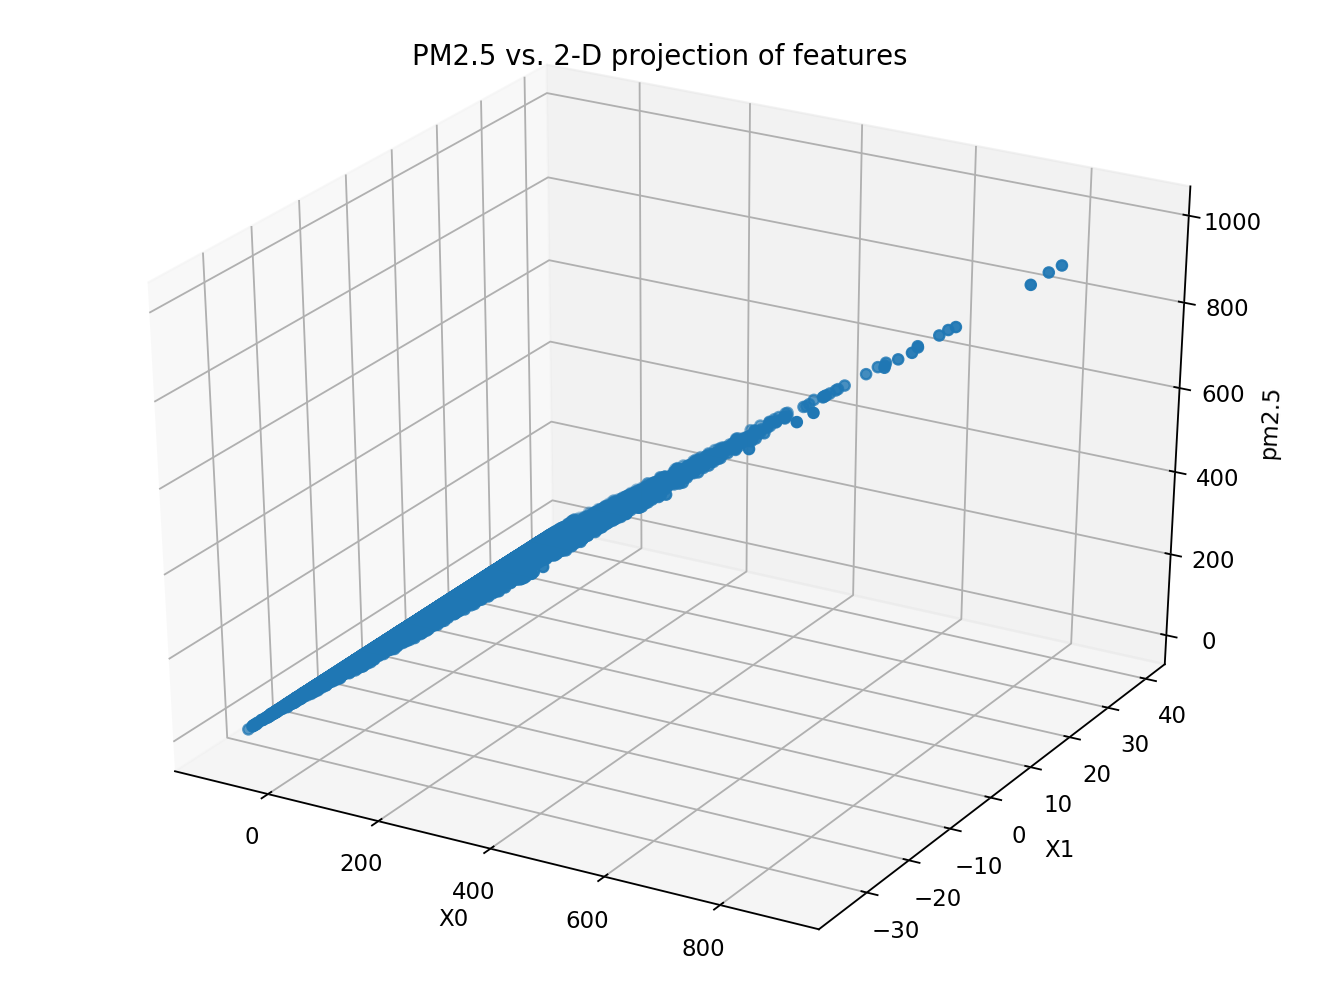

In [11]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig)

# Create a scatter plot on the 3D axes.
# x-axis = column 0 of X_2d, y-axis = column 1 of X_2d, z-axis: pm2.5
ax.scatter(X_2d[:, 0], X_2d[:, 1], y)
ax.set_xlabel('X0')
ax.set_ylabel('X1')
ax.set_zlabel('pm2.5')
ax.set(title = 'PM2.5 vs. 2-D projection of features')
plt.show()

## 3. Shuffle data and split into training and test sets

In [12]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=.1)

print(train_X.shape, test_X.shape, train_y.shape, test_y.shape)

(37581, 6) (4176, 6) (37581,) (4176,)


## 4. Scale the training and test sets

In [13]:
X_scaler = StandardScaler()
y_scaler = StandardScaler()

train_X_scaled = X_scaler.fit_transform(train_X)
test_X_scaled = X_scaler.transform(test_X)

train_y_scaled = y_scaler.fit_transform(train_y.values.reshape(-1, 1))
test_y_scaled = y_scaler.transform(test_y. values.reshape(-1, 1))

print(train_X_scaled)
print(train_y_scaled)

[[ 0.14023678 -0.8722627   0.2148438  -0.89785447  1.77243087 -1.39995354]
 [ 0.14023678  0.72138898 -1.3732278  -0.93047355  0.8689263  -1.88531791]
 [ 0.42996953  1.40438256 -1.3732278   0.03722567  0.4582424  -0.52629766]
 ...
 [-0.72896144  0.83522125 -0.36263678 -0.62602885  0.04755851  0.63857684]
 [-1.01869418  0.72138898 -1.51759795  3.03818053 -0.44526217  0.34735821]
 [-1.01869418  0.03839541  0.64795423 -0.49555255 -0.44526217  0.44443109]]
[[-0.89785447]
 [-0.93047355]
 [ 0.03722567]
 ...
 [-0.62602885]
 [ 3.03818053]
 [-0.49555255]]


## 5. Train linear regression and evaluate metrics

In [14]:
lin = LinearRegression()
lin.fit(train_X_scaled, train_y_scaled)

lin_pred_scaled = lin.predict(test_X_scaled)
print(lin.coef_, lin.intercept_)

print('MSE:', mean_squared_error(test_y_scaled, lin_pred_scaled))
print('R2:', r2_score(test_y_scaled, lin_pred_scaled))

[[-8.89031727e-17 -4.02668141e-16  1.67095777e-16  1.00000000e+00
  -1.79940510e-16  9.80558187e-18]] [7.39557099e-32]
MSE: 2.4290941488724134e-30
R2: 1.0


## 6. Train linear regression with Stochastic Gradient Descent and evaluate metrics

In [15]:
sgd = SGDRegressor(verbose=True, tol=1e-9, max_iter=1000)
sgd.fit(train_X_scaled, train_y_scaled.ravel())

sgd_pred_scaled = sgd.predict(test_X_scaled)
print(sgd.coef_, sgd.intercept_)

print('MSE:', mean_squared_error(test_y_scaled, sgd_pred_scaled))
print('R2:', r2_score(test_y_scaled, sgd_pred_scaled))

-- Epoch 1
Norm: 1.00, NNZs: 6, Bias: -0.000005, T: 37581, Avg. loss: 0.001909
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 6, Bias: -0.000000, T: 75162, Avg. loss: 0.000000
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 6, Bias: 0.000001, T: 112743, Avg. loss: 0.000000
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 1.00, NNZs: 6, Bias: -0.000002, T: 150324, Avg. loss: 0.000000
Total training time: 0.04 seconds.
Convergence after 4 epochs took 0.04 seconds
[ 1.92404937e-06  1.12963892e-05  1.15170929e-06  9.99889247e-01
 -4.53234882e-05 -4.21132274e-05] [-1.50159714e-06]
MSE: 1.1508319677557032e-08
R2: 0.9999999886848849


## 7. Get a prediction

In [16]:
test_input = test_X[:5]
test_input_scaled = X_scaler.transform(test_input)

truths = test_y[:5]

results_sgd = y_scaler.inverse_transform(sgd.predict(test_input_scaled))
results_lin = y_scaler.inverse_transform(lin.predict(test_input_scaled))

for truth, result_sgd, result_lin in zip(truths, results_sgd, results_lin):
    print('Truth: %.2f, Linear Regression: %.2f, Linear Regression using SGD: %.2f' 
          % (truth, result_sgd, result_lin))

Truth: 180.00, Linear Regression: 179.99, Linear Regression using SGD: 180.00
Truth: 19.00, Linear Regression: 19.01, Linear Regression using SGD: 19.00
Truth: 27.00, Linear Regression: 27.01, Linear Regression using SGD: 27.00
Truth: 110.00, Linear Regression: 110.00, Linear Regression using SGD: 110.00
Truth: 9.00, Linear Regression: 9.01, Linear Regression using SGD: 9.00


# 8. Explore Improvements 1 - Add back missing column

This is just an illustration of possible improvements to explore.

Add back the combined wind speed column

In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
cbwd_encoded = le.fit_transform(df.cbwd)

# Add column to the dataframe
df_cbwd = pd.DataFrame({'cbwd_encoded': cbwd_encoded}, index=df.index)
df_new = pd.concat([df, df_cbwd], axis=1)

# Re-train model
X_columns = list(df_new.columns.values)
X_columns.remove('No')
X_columns.remove('cbwd')
X_columns.remove('pm2.5')

X = df_new.loc[:, X_columns]
y = df_new['pm2.5']

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=.1)

X_scaler = StandardScaler()
y_scaler = StandardScaler()

train_X_scaled = X_scaler.fit_transform(train_X)
test_X_scaled = X_scaler.transform(test_X)

train_y_scaled = y_scaler.fit_transform(train_y.values.reshape(-1, 1))
test_y_scaled = y_scaler.transform(test_y. values.reshape(-1, 1))

lin = LinearRegression()
lin.fit(train_X_scaled, train_y_scaled)

lin_pred_scaled = lin.predict(test_X_scaled)

print('MSE:', mean_squared_error(test_y_scaled, lin_pred_scaled))
print('R2:', r2_score(test_y_scaled, lin_pred_scaled))

sgd = SGDRegressor(verbose=True, tol=1e-9, max_iter=1000)
sgd.fit(train_X_scaled, train_y_scaled.ravel())

sgd_pred_scaled = sgd.predict(test_X_scaled)

print('SGD MSE:', mean_squared_error(test_y_scaled, sgd_pred_scaled))
print('SGD R2:', r2_score(test_y_scaled, sgd_pred_scaled))

MSE: 0.6831404070229338
R2: 0.2843159034756275
-- Epoch 1
Norm: 1.14, NNZs: 11, Bias: 0.014186, T: 37581, Avg. loss: 0.372638
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.17, NNZs: 11, Bias: 0.028260, T: 75162, Avg. loss: 0.367077
Total training time: 0.03 seconds.
-- Epoch 3
Norm: 1.15, NNZs: 11, Bias: -0.011169, T: 112743, Avg. loss: 0.366924
Total training time: 0.04 seconds.
-- Epoch 4
Norm: 1.15, NNZs: 11, Bias: 0.004339, T: 150324, Avg. loss: 0.366897
Total training time: 0.05 seconds.
-- Epoch 5
Norm: 1.15, NNZs: 11, Bias: 0.010095, T: 187905, Avg. loss: 0.366707
Total training time: 0.06 seconds.
-- Epoch 6
Norm: 1.14, NNZs: 11, Bias: -0.018603, T: 225486, Avg. loss: 0.366601
Total training time: 0.07 seconds.
-- Epoch 7
Norm: 1.15, NNZs: 11, Bias: 0.007075, T: 263067, Avg. loss: 0.366645
Total training time: 0.08 seconds.
Convergence after 7 epochs took 0.08 seconds
SGD MSE: 0.6834777358982493
SGD R2: 0.2839625048054861


train_size mean_train_score (3-fold cv) mean_val_score (3-fold cv)
2505 0.27457073015269573 0.26633306441515486
8142 0.2667475607662118 0.26780871027704684
13779 0.2680838260118053 0.26829219437423707
19416 0.2687214419558731 0.26822855571560217
25054 0.2689677789849864 0.2683544990071127


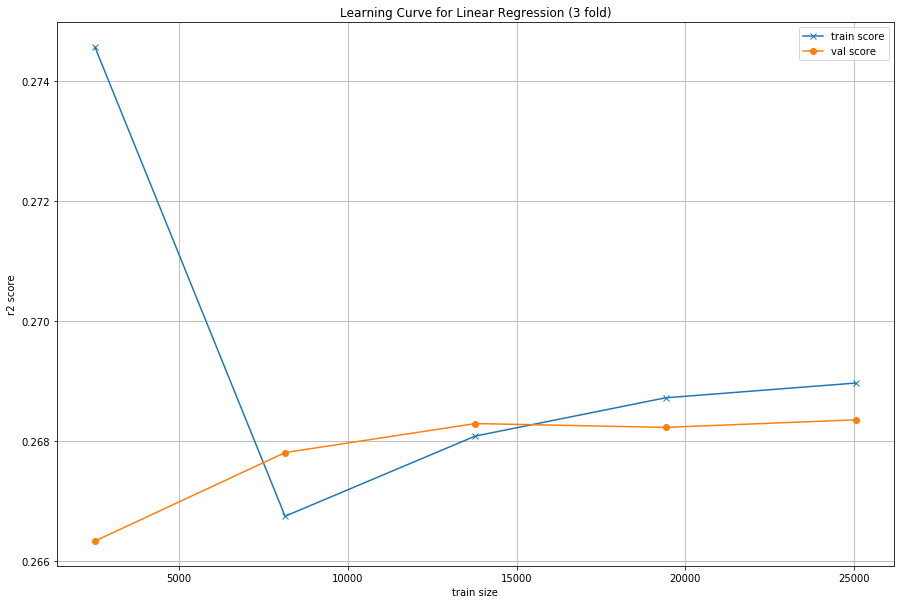

In [25]:
%matplotlib inline
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression

lin2 = LinearRegression()

# training set size (excluding validation set), training set score, validation set score
train_sizes, train_score, val_score = learning_curve(lin2, train_X_scaled, train_y_scaled)

train_mean = np.mean(train_score, axis=1)
val_mean = np.mean(val_score, axis=1)

print('train_size', 'mean_train_score (3-fold cv)', 'mean_val_score (3-fold cv)')
for train_size, t, m in zip(train_sizes, train_mean, val_mean):
    print(train_size, t, m)
    
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(train_sizes, train_mean, label='train score', marker='x')
ax.plot(train_sizes, val_mean, label='val score', marker='o')
ax.set(xlabel='train size', ylabel='r2 score', title='Learning Curve for Linear Regression (3 fold)')
ax.grid()
ax.legend()
plt.show()

# 8. Explore Improvements 2 - Decision Tree

This is just an illustration of possible improvements to explore.

Try Decision Tree. This will be covered in a future class (trees.ipynb), but Decision Trees are a general purpose solver that can model Regression problems.

We'll use the simplest decision tree regressor.

In [20]:
# Documentation: http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(train_X_scaled, train_y_scaled)

tree_pred_scaled = tree.predict(test_X_scaled)

print('MSE (Decision Tree):', mean_squared_error(test_y_scaled, tree_pred_scaled))
print('R2 (Decision Tree):', r2_score(test_y_scaled, tree_pred_scaled))

MSE (Decision Tree): 0.26921810113896455
R2 (Decision Tree): 0.7091307455961156


Wow, so much better.

This is because the data is likely non-linear.

In [30]:
test_input = test_X[:5]
test_input_scaled = X_scaler.transform(test_input)

truths = test_y[:5]

# compare side-by-side
results_lin = y_scaler.inverse_transform(lin.predict(test_input_scaled))
results_sgd = y_scaler.inverse_transform(sgd.predict(test_input_scaled))
results_tree = y_scaler.inverse_transform(tree.predict(test_input_scaled))

for truth, result_lin, result_sgd, result_tree in zip(truths, results_lin, results_sgd, results_tree):
    print('Truth: %.2f, Linear Regression: %.2f, Linear Regression (SGD): %.2f, Decision Tree: %.2f' 
          % (truth, result_sgd, result_lin, result_tree))

Truth: 63.00, Linear Regression: 152.45, Linear Regression (SGD): 153.37, Decision Tree: 85.00
Truth: 15.00, Linear Regression: 34.66, Linear Regression (SGD): 33.44, Decision Tree: 28.00
Truth: 41.00, Linear Regression: 134.34, Linear Regression (SGD): 136.25, Decision Tree: 27.00
Truth: 141.00, Linear Regression: 62.76, Linear Regression (SGD): 64.47, Decision Tree: 134.00
Truth: 196.00, Linear Regression: 108.95, Linear Regression (SGD): 104.83, Decision Tree: 165.00
